# Import packages

In [46]:
import pandas as pd
import pickle as pkl
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from pycaret.classification import *

# Import data

In [47]:
path_to_data = r'/Users/noahstanis/Documents/24 Spring quarter/CSE 599 AI for Neuroscience/final project/CSE599_data.pkl'
data = pd.read_pickle(path_to_data).dropna()
data

,date,stim,angle,inform theta A3,inform theta A5,inform theta A6,inform theta A12,inform theta A14,inform theta B3,inform theta B4,...,move hg3 A6,move hg3 A12,move hg3 A14,move hg3 B3,move hg3 B4,move hg3 B5,move hg3 B6,move hg3 B12,move hg3 B13,move hg3 B16
0,2021-11-15,1,90,2767.058769,3319.577140,1598.683546,1835.240369,4661.079116,1553.194879,238.416317,...,0.019960,0.021739,0.052374,0.019361,0.005314,0.027500,0.007524,0.033852,0.002961,0.043641
1,2021-11-15,0,360,104.255676,77.883471,131.180743,30.436747,97.835145,17.705533,16.494238,...,0.000511,0.000794,0.000422,0.000738,0.000873,0.000634,0.000790,0.000423,0.000483,0.000498
2,2021-11-15,0,270,50.150293,45.327700,51.920366,32.971029,47.178743,24.481136,23.102153,...,0.000756,0.000774,0.000698,0.000727,0.000629,0.000709,0.000844,0.000582,0.000575,0.000678
3,2021-11-15,1,180,3062.375759,3277.085984,1758.470990,1659.383445,4976.446367,1515.910051,178.259006,...,0.001481,0.002181,0.002937,0.002050,0.001511,0.001895,0.001670,0.002351,0.000655,0.002700
4,2021-11-15,1,90,3162.540746,3293.016385,1680.266837,1662.085155,4950.645708,1550.942740,223.833651,...,0.000617,0.000723,0.002043,0.000387,0.000687,0.000930,0.001235,0.001882,0.000684,0.002123
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,2021-11-17,1,90,3533.357569,5335.825708,3787.332218,2801.347717,7303.050300,2430.308162,195.150881,...,0.001427,0.000947,0.001290,0.000906,0.000600,0.000735,0.001189,0.001319,0.000609,0.000828
1034,2021-11-17,1,180,3653.666805,5460.681404,3912.295809,2852.188620,7275.477266,2427.235555,192.783265,...,0.000982,0.000686,0.001463,0.000632,0.000859,0.000653,0.001357,0.002504,0.000480,0.000864
1035,2021-11-17,1,360,2210.131825,3460.735719,2300.639411,1699.945210,4737.534607,1360.639129,119.452321,...,0.002464,0.001497,0.000932,0.001163,0.000865,0.000840,0.002297,0.000550,0.001080,0.000752
1036,2021-11-17,0,180,10.937448,8.520922,11.501547,9.964744,12.844933,5.909308,3.972222,...,0.000472,0.000376,0.000607,0.000423,0.000448,0.000488,0.000472,0.000437,0.000372,0.000726


# Helper functions

In [69]:
def plot_pca(PC_data, data):
    fig, ax = plt.subplots(1, 3, figsize=[10, 4])
    
    # Separate data by reach angle
    angle_90 = PC_data[(data['angle'] == 90).tolist()]
    angle_180 = PC_data[(data['angle'] == 180).tolist()]
    angle_270 = PC_data[(data['angle'] == 270).tolist()]
    angle_360 = PC_data[(data['angle'] == 360).tolist()]
    
    # Separate by date
    date_15 = PC_data[(data['date'] == '2021-11-15').tolist()]
    date_16 = PC_data[(data['date'] == '2021-11-16').tolist()]
    date_17 = PC_data[(data['date'] == '2021-11-17').tolist()]
    
    # Separate by stim
    stim = PC_data[(data['stim'] == 1).tolist()]
    nostim = PC_data[(data['stim'] == 0).tolist()]
    
    # Plot PCs
    ax[0].scatter(angle_90[0].values, angle_90[1].values, color='red', alpha=0.5)
    ax[0].scatter(angle_180[0].values, angle_180[1].values, color='green', alpha=0.5)
    ax[0].scatter(angle_270[0].values, angle_270[1].values, color='blue', alpha=0.5)
    ax[0].scatter(angle_360[0].values, angle_360[1].values, color='black', alpha=0.5)
    ax[0].set_xlabel("PC 1")
    ax[0].set_ylabel("PC 2")
    ax[0].grid(False)
    ax[0].legend(["90","180","270","360"])
    ax[0].set_title("Angle")
    
    ax[1].scatter(date_15[0].values, date_15[1].values, color='red', alpha=0.5)
    ax[1].scatter(date_16[0].values, date_16[1].values, color='green', alpha=0.5)
    ax[1].scatter(date_17[0].values, date_17[1].values, color='blue', alpha=0.5)
    ax[1].set_xlabel("PC 1")
    ax[1].set_ylabel("PC 2")
    ax[1].grid(False)
    ax[1].legend(["11/15","11/16","11/17"])
    ax[1].set_title("Date")
    
    ax[2].scatter(stim[0].values, stim[1].values, color='black', alpha=0.5)
    ax[2].scatter(nostim[0].values, nostim[1].values, color='red', alpha=0.5)
    ax[2].set_xlabel("PC 1")
    ax[2].set_ylabel("PC 2")
    ax[2].grid(False)
    ax[2].legend(["stim","no stim"])
    ax[2].set_title("Stim Condition")
    
    plt.show()

# Classificaiton of reach direction on raw data 

In [95]:
sub_data = data[data.columns[3:]]

# Target 
target = 'angle'
y = data.loc[:,target].values
sub_data['y'] = y

# Classification
s = setup(sub_data,target = 'y',transformation = False, n_jobs = 6, verbose = 0)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.4142,0.0000,0.4142,0.4180,0.4138,0.2155,0.2162,0.0090
ridge,Ridge Classifier,0.3899,0.0000,0.3899,0.3894,0.3830,0.1841,0.1863,0.0080
lightgbm,Light Gradient Boosting Machine,0.3849,0.6443,0.3849,0.3885,0.3832,0.1765,0.1774,0.3910
gbc,Gradient Boosting Classifier,0.3768,0.0000,0.3768,0.3772,0.3719,0.1663,0.1676,1.2440
rf,Random Forest Classifier,0.3527,0.6344,0.3527,0.3637,0.3502,0.1322,0.1339,0.0470
et,Extra Trees Classifier,0.3510,0.6325,0.3510,0.3515,0.3433,0.1283,0.1305,0.0260
ada,Ada Boost Classifier,0.3461,0.0000,0.3461,0.3506,0.3421,0.1240,0.1256,0.0770
lr,Logistic Regression,0.3285,0.0000,0.3285,0.3307,0.3248,0.1000,0.1009,0.3190
dt,Decision Tree Classifier,0.3091,0.5381,0.3091,0.3098,0.3077,0.0762,0.0765,0.0160
svm,SVM - Linear Kernel,0.3059,0.0000,0.3059,0.3012,0.2332,0.0776,0.0991,0.0090


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

# PCA 

Text(0.5, 0, 'PC #')

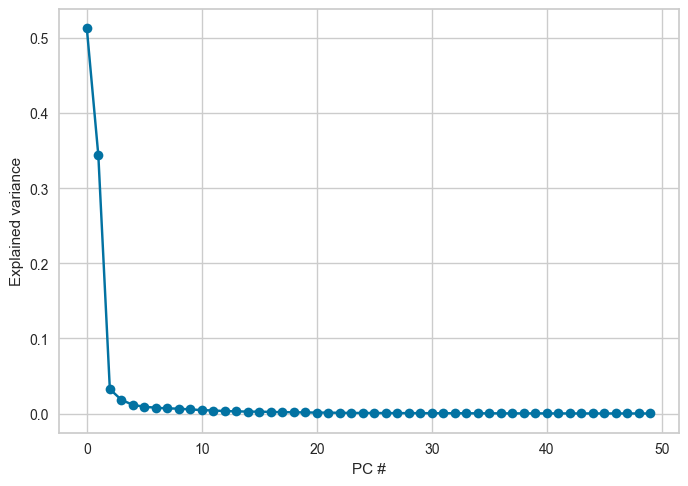

In [70]:
# Separating out the features
x = data[data.columns[3:]]

# Separating out the target
target = 'angle'
y = data.loc[:,target].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

# Take top two principal components
pca = PCA(n_components=50)

# Transform data 
principalComponents = pca.fit_transform(x)

principalDf = pd.DataFrame(data = principalComponents)

fig, ax = plt.subplots()
plt.plot(pca.explained_variance_ratio_,marker = 'o')
plt.ylabel("Explained variance")
plt.xlabel("PC #")

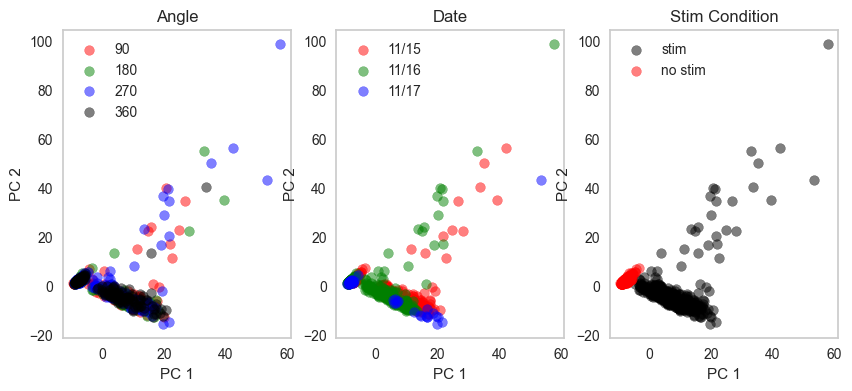

In [71]:
plot_pca(principalDf, data)

# Classification

In [72]:
# Target 
target = 'angle'
y = data.loc[:,target].values
principalDf['y'] = y

# Stim and Nostim conditions
s = setup(principalDf,target = 'y',transformation = False, n_jobs = 6, verbose = 0)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.3901,0.0000,0.3901,0.3943,0.3866,0.1840,0.1858,0.1980
lightgbm,Light Gradient Boosting Machine,0.3899,0.6244,0.3899,0.3934,0.3864,0.1831,0.1845,0.3830
lda,Linear Discriminant Analysis,0.3853,0.0000,0.3853,0.3904,0.3840,0.1773,0.1785,0.0050
ridge,Ridge Classifier,0.3805,0.0000,0.3805,0.3830,0.3779,0.1715,0.1728,0.0040
rf,Random Forest Classifier,0.3546,0.6208,0.3546,0.3638,0.3489,0.1318,0.1339,0.0340
svm,SVM - Linear Kernel,0.3544,0.0000,0.3544,0.3680,0.3502,0.1393,0.1420,0.0060
gbc,Gradient Boosting Classifier,0.3512,0.0000,0.3512,0.3454,0.3448,0.1306,0.1314,0.3860
ada,Ada Boost Classifier,0.3463,0.0000,0.3463,0.3468,0.3419,0.1242,0.1251,0.0310
et,Extra Trees Classifier,0.3448,0.6111,0.3448,0.3470,0.3354,0.1179,0.1206,0.0270
qda,Quadratic Discriminant Analysis,0.3010,0.0000,0.3010,0.3164,0.2925,0.0725,0.0757,0.0050


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1879, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# PC space of nostim data, then project stim data into it

##### The previous PCA separated the stim conditions well, but not the reach directions. The following performs PCA on the nostim condition, then projects both the nostim trials and stim trials into this PC space

In [82]:
data_nostim = data[data['stim'] == 0]
data_stim = data[data['stim'] == 1]

Text(0.5, 0, 'PC #')

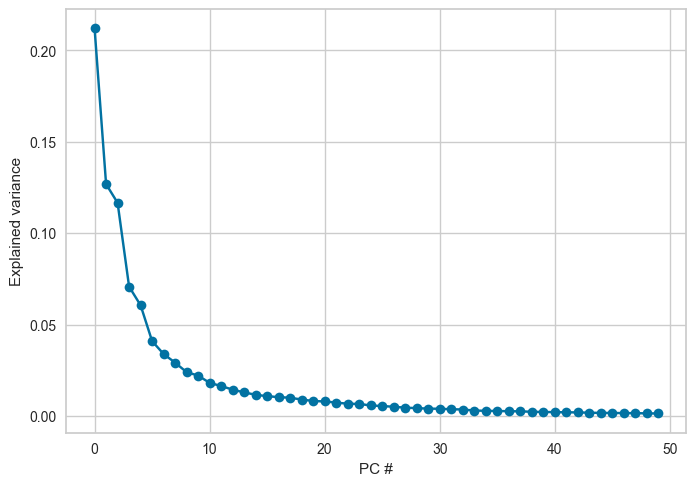

In [84]:
# Separating out the features
x_nostim = data_nostim[data_nostim.columns[3:]]
x_stim = data_stim[data_stim.columns[3:]]

# Standardizing the features
x_nostim = StandardScaler().fit_transform(x_nostim)
x_stim = StandardScaler().fit_transform(x_stim)

# Take top two principal components
pca = PCA(n_components=50)

# Transform data 
principalComponents_nostim = pca.fit_transform(x_nostim)
principalComponents_stim = pca.transform(x_stim)

# Save into dataframe
principalDf_stim = pd.DataFrame(data = principalComponents_stim)
principalDf_nostim = pd.DataFrame(data = principalComponents_nostim)

fig, ax = plt.subplots()
plt.plot(pca.explained_variance_ratio_,marker = 'o')
plt.ylabel("Explained variance")
plt.xlabel("PC #")

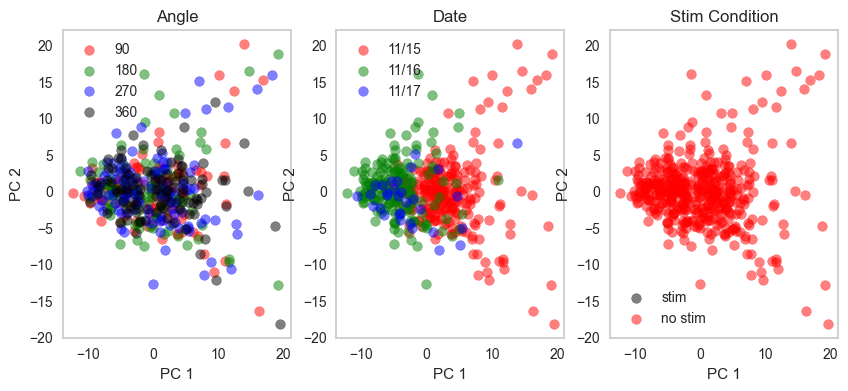

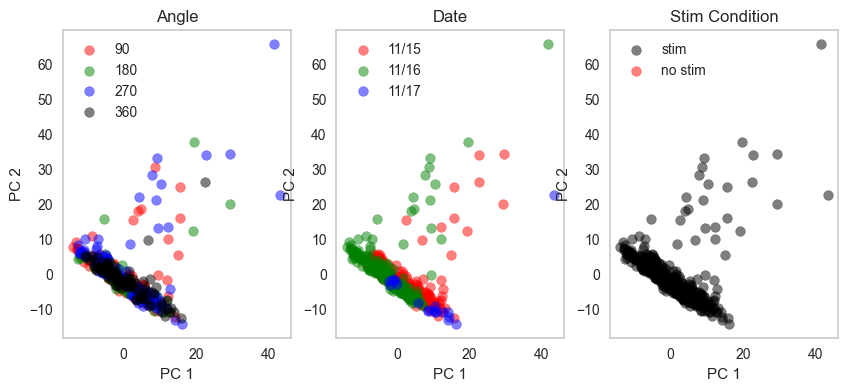

In [85]:
# PC space of no stim condition
plot_pca(principalDf_nostim,data_nostim)

# PC space of stim condition
plot_pca(principalDf_stim,data_stim)

# Classification

In [86]:
# Target 
target = 'angle'
y = data_nostim.loc[:,target].values
principalDf_nostim['y'] = y

y = data_stim.loc[:,target].values
principalDf_stim['y'] = y

# Nostim classification
s = setup(principalDf_nostim,target = 'y',transformation = False, n_jobs = 6, verbose = 0)
compare_models()

# Stim classification
s = setup(principalDf_stim,target = 'y',transformation = False, n_jobs = 6, verbose = 0)
compare_models()



,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.4434,0.0000,0.4434,0.4411,0.4342,0.2562,0.2601,0.0050
lda,Linear Discriminant Analysis,0.4339,0.0000,0.4339,0.4320,0.4255,0.2434,0.2465,0.0040
lr,Logistic Regression,0.4176,0.0000,0.4176,0.4191,0.4087,0.2219,0.2255,0.0070
svm,SVM - Linear Kernel,0.3794,0.0000,0.3794,0.3921,0.3769,0.1692,0.1710,0.0060
lightgbm,Light Gradient Boosting Machine,0.3756,0.6346,0.3756,0.3848,0.3693,0.1633,0.1661,0.1900
nb,Naive Bayes,0.3656,0.5992,0.3656,0.3725,0.3587,0.1547,0.1574,0.0050
rf,Random Forest Classifier,0.3592,0.6298,0.3592,0.3811,0.3513,0.1396,0.1436,0.0250
ada,Ada Boost Classifier,0.3431,0.0000,0.3431,0.3436,0.3284,0.1192,0.1244,0.0190
et,Extra Trees Classifier,0.3431,0.6162,0.3431,0.3631,0.3341,0.1171,0.1211,0.0230
gbc,Gradient Boosting Classifier,0.3366,0.0000,0.3366,0.3332,0.3244,0.1102,0.1132,0.1870


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.3365,0.6002,0.3365,0.3453,0.3269,0.1080,0.1124,0.0230
knn,K Neighbors Classifier,0.3299,0.5955,0.3299,0.3279,0.3090,0.0975,0.1025,0.0040
gbc,Gradient Boosting Classifier,0.3238,0.0000,0.3238,0.3187,0.3126,0.0938,0.0951,0.1970
lightgbm,Light Gradient Boosting Machine,0.3237,0.5962,0.3237,0.3247,0.3178,0.0949,0.0959,0.2160
lda,Linear Discriminant Analysis,0.3234,0.0000,0.3234,0.3261,0.3171,0.0937,0.0949,0.0040
nb,Naive Bayes,0.3108,0.5796,0.3108,0.3365,0.2991,0.0890,0.0950,0.0040
ridge,Ridge Classifier,0.3108,0.0000,0.3108,0.3087,0.3014,0.0776,0.0788,0.0040
rf,Random Forest Classifier,0.3042,0.5654,0.3042,0.3120,0.2928,0.0635,0.0651,0.0250
svm,SVM - Linear Kernel,0.2949,0.0000,0.2949,0.2947,0.2820,0.0559,0.0558,0.0050
dt,Decision Tree Classifier,0.2943,0.5288,0.2943,0.2963,0.2891,0.0573,0.0583,0.0050


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='sqrt',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_samples_leaf=1,
                     min_samples_split=2, min_weight_fraction_leaf=0.0,
                     monotonic_cst=None, n_estimators=100, n_jobs=6,
                     oob_score=False, random_state=7232, verbose=0,
                     warm_start=False)

# PC space of nostim data, then project stim data into it

##### This new PC subspace found by the nostim data creates clusters based on date well for both the stim and nostim data. It does a slightly better job at classifying the nostim data, but with the tradeoff of a worse classification performance on the stim data. In both casses, classification is > 25% (chance level) meaning the PC space is somehow caputring slight differences in reaching directions, but not perfectly. 

##### Now we attempt to find a PC space only using a single date to try and increase the performance of the classifier. This PC space will no longer have the variability of dates to construct principal components; therefore, the the explained variance should align with the behaivioral task at hand better. 

##### Again the PC space of nostim data is found first, then both the stim and nostim trials are projected into this subspace

In [87]:
data_date_15 = data[data['date'] == '2021-11-15']
data_nostim_15 = data_date_15[data_date_15['stim'] == 0]
data_stim_15 = data_date_15[data_date_15['stim'] == 1]

Text(0.5, 0, 'PC #')

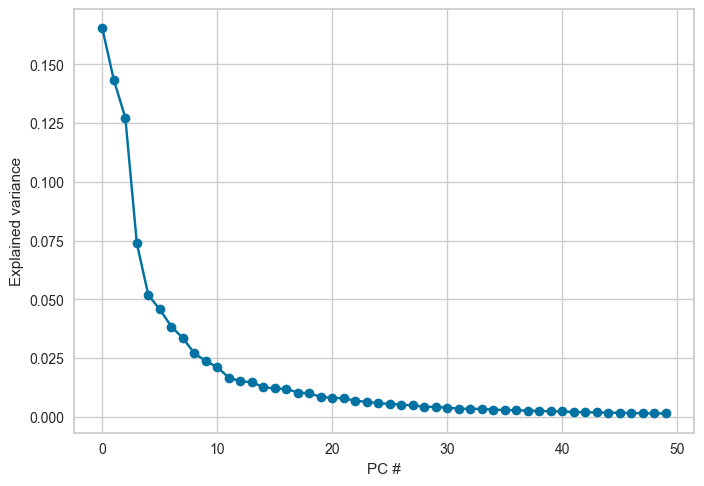

In [88]:
# Separating out the features
x_nostim_15 = data_nostim_15[data_nostim_15.columns[3:]]
x_stim_15 = data_stim_15[data_stim_15.columns[3:]]

# Standardizing the features
x_nostim_15 = StandardScaler().fit_transform(x_nostim_15)
x_stim_15 = StandardScaler().fit_transform(x_stim_15)

# Take top two principal components
pca = PCA(n_components=50)

# Transform data 
principalComponents_nostim_15 = pca.fit_transform(x_nostim_15)
principalComponents_stim_15 = pca.transform(x_stim_15)

# Save into dataframe
principalDf_stim_15 = pd.DataFrame(data = principalComponents_stim_15)
principalDf_nostim_15 = pd.DataFrame(data = principalComponents_nostim_15)

fig, ax = plt.subplots()
plt.plot(pca.explained_variance_ratio_,marker = 'o')
plt.ylabel("Explained variance")
plt.xlabel("PC #")

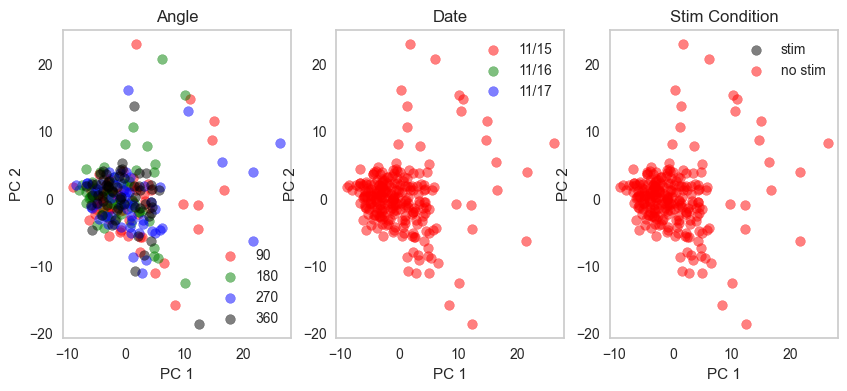

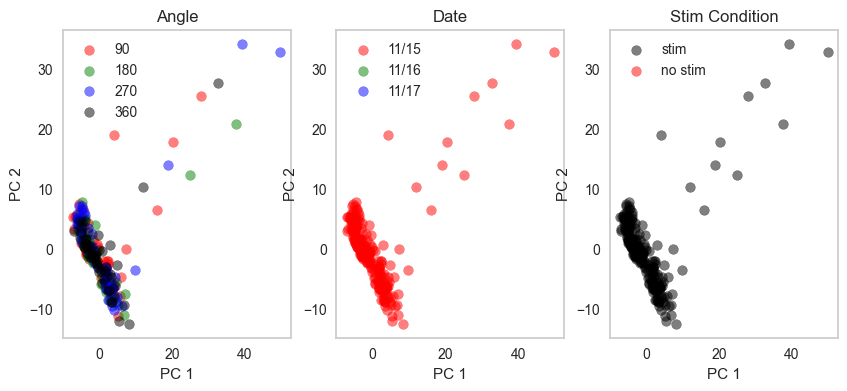

In [89]:
# No stim trials
plot_pca(principalDf_nostim_15,data_nostim_15)

# Stim trials
plot_pca(principalDf_stim_15,data_stim_15)


In [90]:
# Target 
target = 'angle'
y = data_nostim_15.loc[:,target].values
principalDf_nostim_15['y'] = y

y = data_stim_15.loc[:,target].values
principalDf_stim_15['y'] = y

# Nostim classification
s = setup(principalDf_nostim_15,target = 'y',transformation = False, n_jobs = 6, verbose = 0)
compare_models()

# Stim classification
s = setup(principalDf_stim_15,target = 'y',transformation = False, n_jobs = 6, verbose = 0)
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.4794,0.0000,0.4794,0.4992,0.4744,0.3074,0.3147,0.2300
lda,Linear Discriminant Analysis,0.4735,0.0000,0.4735,0.4855,0.4592,0.2988,0.3062,0.0040
ridge,Ridge Classifier,0.4676,0.0000,0.4676,0.4793,0.4540,0.2902,0.2979,0.0030
svm,SVM - Linear Kernel,0.4434,0.0000,0.4434,0.4991,0.4426,0.2614,0.2739,0.0040
lightgbm,Light Gradient Boosting Machine,0.4298,0.6518,0.4298,0.4564,0.4153,0.2358,0.2441,0.0910
nb,Naive Bayes,0.4250,0.6668,0.4250,0.4436,0.4163,0.2346,0.2405,0.0050
rf,Random Forest Classifier,0.4085,0.6606,0.4085,0.4664,0.4049,0.2049,0.2136,0.0190
gbc,Gradient Boosting Classifier,0.3945,0.0000,0.3945,0.4218,0.3848,0.1877,0.1957,0.1130
ada,Ada Boost Classifier,0.3713,0.0000,0.3713,0.4129,0.3469,0.1569,0.1708,0.0160
et,Extra Trees Classifier,0.3471,0.6338,0.3471,0.4022,0.3457,0.1255,0.1313,0.0190


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lda,Linear Discriminant Analysis,0.4412,0.0000,0.4412,0.4598,0.4245,0.2489,0.2596,0.0050
ada,Ada Boost Classifier,0.4000,0.0000,0.4000,0.4068,0.3747,0.1871,0.2008,0.0160
ridge,Ridge Classifier,0.3941,0.0000,0.3941,0.4016,0.3815,0.1860,0.1908,0.0040
lr,Logistic Regression,0.3882,0.0000,0.3882,0.3719,0.3725,0.1759,0.1779,0.0050
gbc,Gradient Boosting Classifier,0.3882,0.0000,0.3882,0.3913,0.3647,0.1804,0.1884,0.1020
et,Extra Trees Classifier,0.3471,0.6068,0.3471,0.3353,0.3279,0.1217,0.1276,0.0210
nb,Naive Bayes,0.3412,0.6207,0.3412,0.3048,0.3119,0.1156,0.1216,0.0040
lightgbm,Light Gradient Boosting Machine,0.3412,0.5837,0.3412,0.3294,0.3241,0.1129,0.1158,0.1080
svm,SVM - Linear Kernel,0.3294,0.0000,0.3294,0.3164,0.3033,0.0947,0.0971,0.0040
rf,Random Forest Classifier,0.3235,0.5887,0.3235,0.3232,0.3074,0.0904,0.0941,0.0220


Processing:   0%|          | 0/61 [00:00<?, ?it/s]

LinearDiscriminantAnalysis(covariance_estimator=None, n_components=None,
                           priors=None, shrinkage=None, solver='svd',
                           store_covariance=False, tol=0.0001)

# Conclusions

##### It seems as though the classifier does an okay job of predicting reach direction from the raw data (42%). It is doing a slightly better job at predicting reach direction on a single date (47% and 44% accuracy for nostim and stim trials respectively). But the variability in reaching directions is not completely captured with simple PCA. 


##### Imporvements could include model selection or feature selection. We will investigate feature selection by using Factor Analysis (FA) to generate a feature space that may be able to improve the classifier's performance. Additionally, we will investigate model selection by using a Recurrent Neural Network (RNN) that will be trained to classify reach direction based on these feature spaces.


##### Additional things to consider: 
##### (1) Can different spectral representations of the data improve classification (smaller time windows?)
##### (2) Can different neraul representations of the data improve classification such as network coherence as an input feature?